## Quantitative exercise
1. Identify which are your independent variables and which are your dependent variables (in the data which you have collected or generated). Write a description of the expected properties of each of these variables.

1. Perform exploratory data analysis. Does your data have the expected properties? If not, can you identify why it does not?

1. Identify what statistical tools you will apply to analyze your data. If you have a model for the relationship between the independent and the dependent variables fit your data to this model. If you do not have a model, what could you to do identify a model, for example using principal component analysis?

1. Generate some visual aids (such as tables or graphs) to present your data to others.

As our project goal is to improve performance in MobileNet, we have a model, some data set and a LIME model.

Independeng variables: 
    1. This includes images parameters such as image contrast, resolution, size, white balance, exposure, histogram,...
    1. It depends on which representative model we choose, for example decision tree, it would be: max_depth, gini index...

Constants
1. Model hyperparameters 
    1. combination of different layers
    2. number of neurons
    3. ...
2. Training/ validation data set

    2. quantity of training data
    3. Distribution of training data, such as 
3. LIME model parameters

    
    
**But like explainability and fidelity of the model, such attributes are not quantifiable. But maybe we can find a reliability metrics to perform quantitative analysis**
----------------------------------------------------------------

Dependent variables: 

1. Model performance, such as accuracy, recall..
2. ...

Gerald Quentin Maguire Jr:

"The expected properties of the data could be a **correlation of variables, trends in the data, having a specific statistical distribution, having a given resolution, etc.**"

 

Expected properties of above-mentioned variables:

1. Model hyperparameters, those variables contribute to model performance, in a black-box manner 
    
2. Training/ validation data set, whese variables are interrealated
    1. The ratio between training and validation data set will affect model fitness
    2. quantity of data will affect model generalization
3. LIME model parameters
    1. It depends on which representative model we choose, for example decision tree, it would be: max_depth, gini index...

### The model could be decision trees or any other explainable models
Such as:
1. decision trees
2. linear models
3. falling rule lists
4. knowledge graph

In [67]:
path = "/home/falconskull/Desktop/XAI/imagenette2-320/train/n01440764/ILSVRC2012_val_00000293.JPEG"

In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

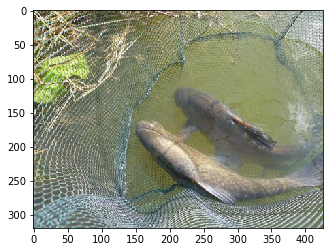

In [73]:
img = cv2.imread(path,cv2.IMREAD_UNCHANGED)


plt.imshow(img)

In [36]:
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

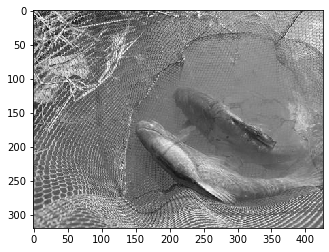

In [42]:
# plt.imshow(img_grey, cmap='gray')

In [39]:
contrast = img_grey.std()

35.14089521597499

In [46]:
import glob
file_images = []
for filename in glob.iglob("/home/falconskull/Desktop/XAI/imagenette2-320/train/" + '**/**', recursive=True):
     if filename[-4:] == "JPEG":
        file_images.append(filename)

In [48]:
file_images[0]

'/home/falconskull/Desktop/XAI/imagenette2-320/train/n03888257/n03888257_5109.JPEG'

In [81]:
list_contrast = []
for path in file_images:
    img = cv2.imread(path,cv2.IMREAD_UNCHANGED)
    if len(img.shape)==3:
        img=img[:,:,::-1]
        img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        img_grey = img
    
#     img = cv2.imread(path,cv2.IMREAD_UNCHANGED)[...,::-1]
#     img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    list_contrast.append(img_grey.std())


In [82]:
# path = "/home/falconskull/Desktop/XAI/imagenette2-320/train/n03888257/n03888257_64147.JPEG"

# img = cv2.imread(path,cv2.IMREAD_UNCHANGED)
# if len(img.shape)==3:
#     img=img[:,:,::-1]
#     img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# else:
#     img_grey = img
# # img = cv2.imread(path,cv2.IMREAD_UNCHANGED)[...,::-1]
# # img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# # list_contrast.append(img_grey.std())
# img_grey.std()

In [83]:
# plt.imshow(img_grey, cmap='gray')

In [71]:
if(len(img.shape)<3):
    print ('gray')
else:
    print("color")

color


In [87]:
list_contrast_r = np.round(list_contrast, 2)

In [88]:
list_contrast_r

array([37.06, 13.11, 28.46, ..., 42.62, 75.81, 78.49])

(array([1.50130996e-04, 1.87663745e-04, 4.12860240e-04, 1.16351522e-03,
        1.31364622e-03, 1.98923570e-03, 1.72650646e-03, 2.58975969e-03,
        3.60314391e-03, 4.09106965e-03, 5.44224862e-03, 6.64329659e-03,
        8.89526153e-03, 1.22356762e-02, 1.53133616e-02, 1.85411780e-02,
        2.11684705e-02, 2.44338197e-02, 2.76991688e-02, 2.67233173e-02,
        2.71737103e-02, 2.30826407e-02, 2.21818547e-02, 2.08306757e-02,
        1.73776628e-02, 1.52758289e-02, 1.19729470e-02, 8.93279428e-03,
        7.28135332e-03, 5.25458487e-03, 3.34041467e-03, 2.70235793e-03,
        2.02676845e-03, 1.53884271e-03, 1.05091697e-03, 4.50392989e-04,
        3.37794742e-04, 1.12598247e-04, 3.75327491e-05, 1.12598247e-04]),
 array([  3.8    ,   6.61375,   9.4275 ,  12.24125,  15.055  ,  17.86875,
         20.6825 ,  23.49625,  26.31   ,  29.12375,  31.9375 ,  34.75125,
         37.565  ,  40.37875,  43.1925 ,  46.00625,  48.82   ,  51.63375,
         54.4475 ,  57.26125,  60.075  ,  62.88875,  65.

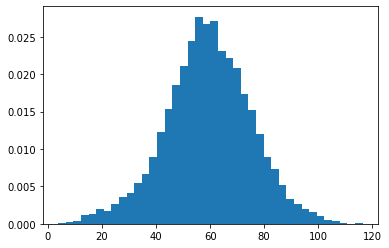

In [97]:
plt.hist(list_contrast_r, density=True, bins=40)

In [101]:
class_names = ["n01440764","n02979186","n03028079","n03417042","n03445777","n02102040","n03000684","n03394916","n03425413","n03888257"]
file_name_classes = [[] for i in range(len(class_names))]

In [103]:
file_images = []
for i in range(len(class_names)):
    for filename in glob.iglob("/home/falconskull/Desktop/XAI/imagenette2-320/train/"+ class_names[i] + '**/**', recursive=True):
         if filename[-4:] == "JPEG":
            file_name_classes[i].append(filename)

In [111]:
list_contrast_classes = [[] for i in range(len(class_names))]
for i in range(len(class_names)):
    for path in file_name_classes[i]:
        img = cv2.imread(path,cv2.IMREAD_UNCHANGED)
        if len(img.shape)==3:
            img=img[:,:,::-1]
            img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        else:
            img_grey = img

        list_contrast_classes[i].append(img_grey.std())

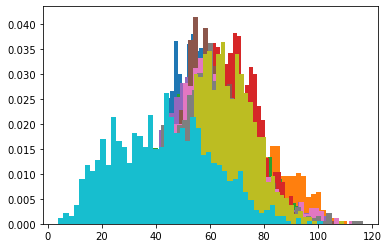

In [116]:
for i in range(len(class_names)):
    plt.hist(list_contrast_classes[i], density=True, bins=50)